In [39]:
import numpy as np
import cv2
import tifffile as tiff
import matplotlib.pyplot as plt
import os

In [40]:
os.listdir('Dataset/DSTL/three_band/')

['6160_2_0.tif',
 '6070_3_4.tif',
 '6020_4_3.tif',
 '6070_1_2.tif',
 '6150_0_1.tif',
 '6100_3_2.tif',
 '6080_2_2.tif',
 '6150_0_3.tif',
 '6040_4_1.tif',
 '6050_0_3.tif',
 '6020_1_2.tif',
 '6070_3_0.tif',
 '6130_0_4.tif',
 '6160_3_1.tif',
 '6010_4_4.tif',
 '6050_4_2.tif',
 '6160_4_1.tif',
 '6060_1_4.tif',
 '6180_0_3.tif',
 '6010_3_0.tif',
 '6110_4_3.tif',
 '6130_4_1.tif',
 '6150_0_2.tif',
 '6030_1_1.tif',
 '6140_0_1.tif',
 '6020_0_3.tif',
 '6160_1_1.tif',
 '6040_1_3.tif',
 '6150_2_4.tif',
 '6110_4_1.tif',
 '6070_1_0.tif',
 '6140_1_4.tif',
 '6120_4_0.tif',
 '6060_0_2.tif',
 '6160_3_4.tif',
 '6170_4_0.tif',
 '6070_4_4.tif',
 '6020_3_1.tif',
 '6030_0_0.tif',
 '6020_1_0.tif',
 '6170_0_3.tif',
 '6040_1_2.tif',
 '6110_4_4.tif',
 '6040_2_2.tif',
 '6120_0_3.tif',
 '6080_2_4.tif',
 '6160_1_3.tif',
 '6100_4_1.tif',
 '6120_4_4.tif',
 '6060_2_1.tif',
 '6180_1_2.tif',
 '6130_3_4.tif',
 '6150_1_1.tif',
 '6080_3_3.tif',
 '6140_4_0.tif',
 '6160_4_3.tif',
 '6070_2_0.tif',
 '6070_2_1.tif',
 '6100_2_2.tif

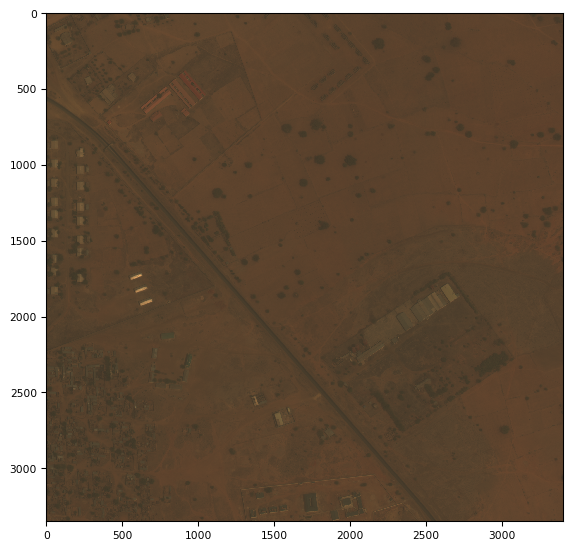

In [58]:
img = tiff.imread('Dataset/DSTL/three_band/6120_3_3.tif')
img.shape
tiff.imshow(img)
plt.show()

In [ ]:
np.pad(img, ((0,0),(100,100),(100,100)),'reflect').shape

In [23]:
(3345-256)%192

17

(64, 64)
86 86 58 59


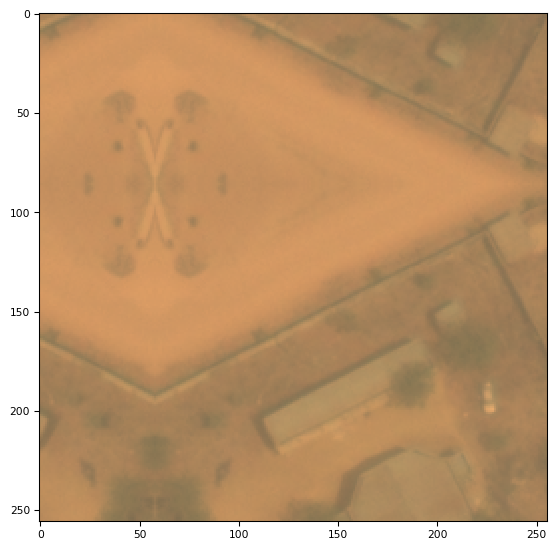

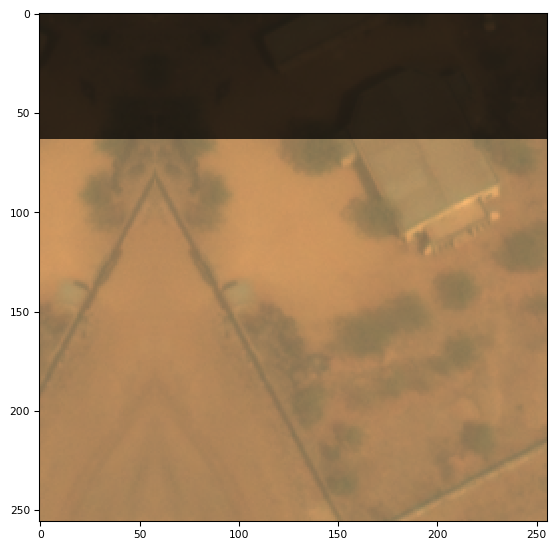

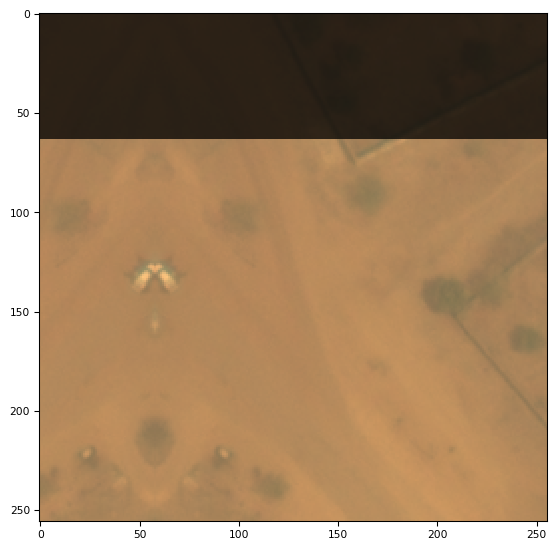

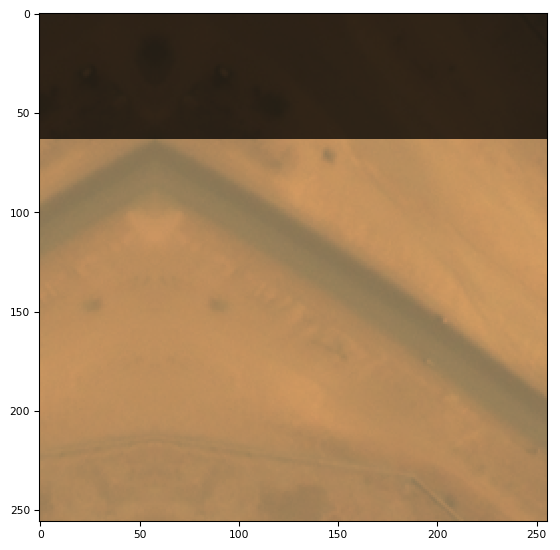

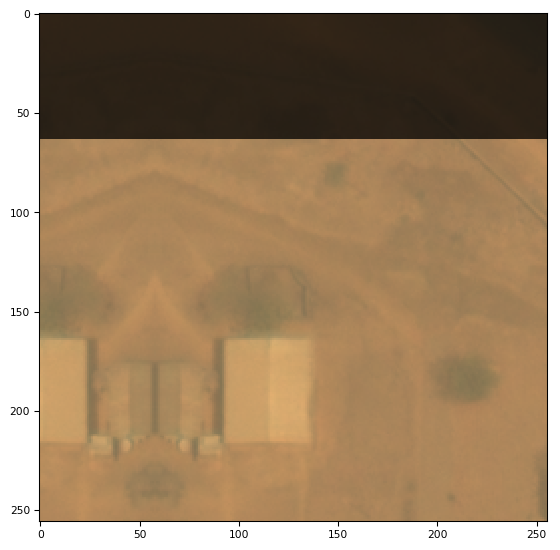

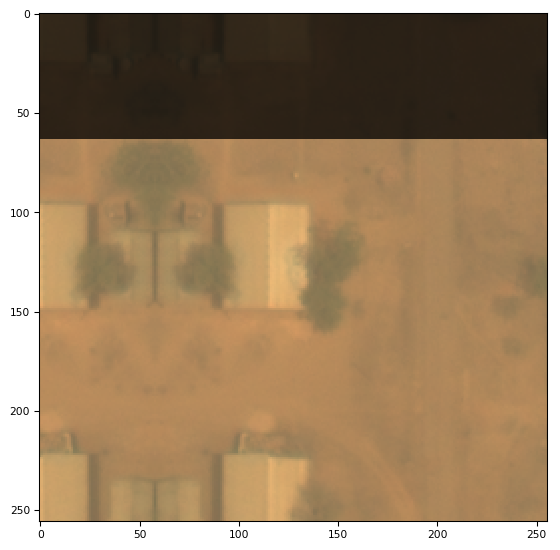

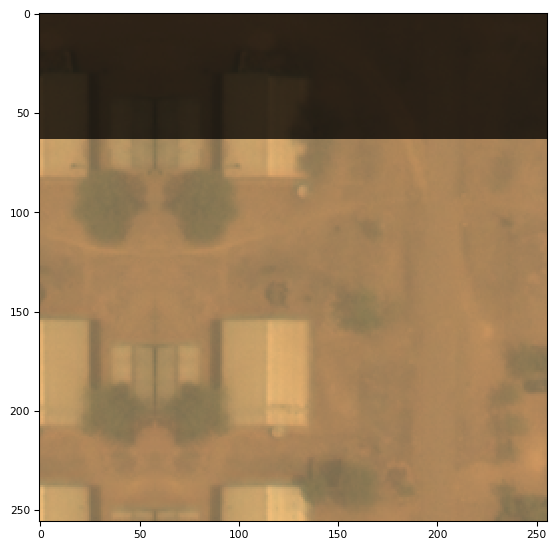

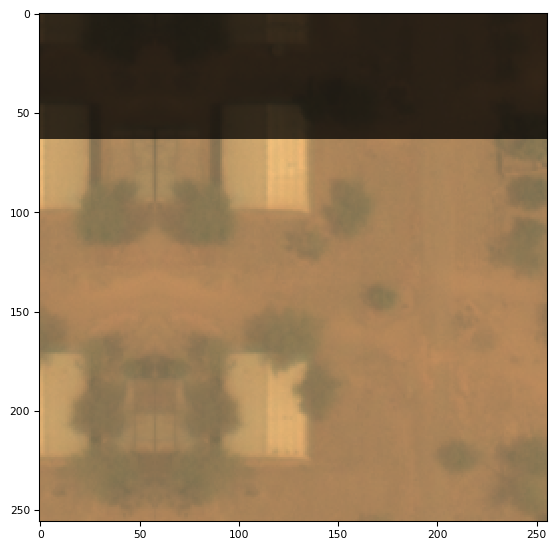

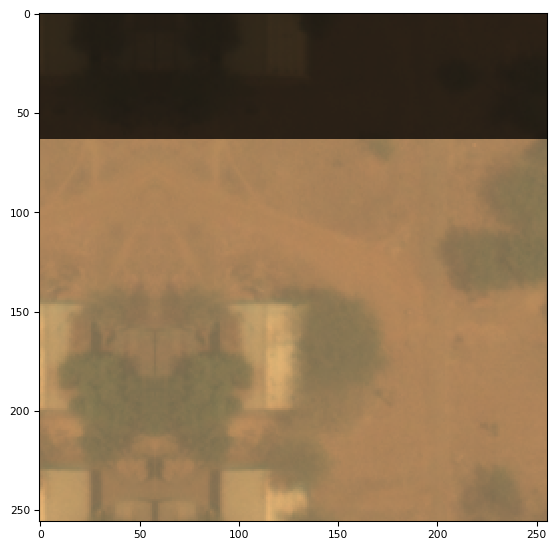

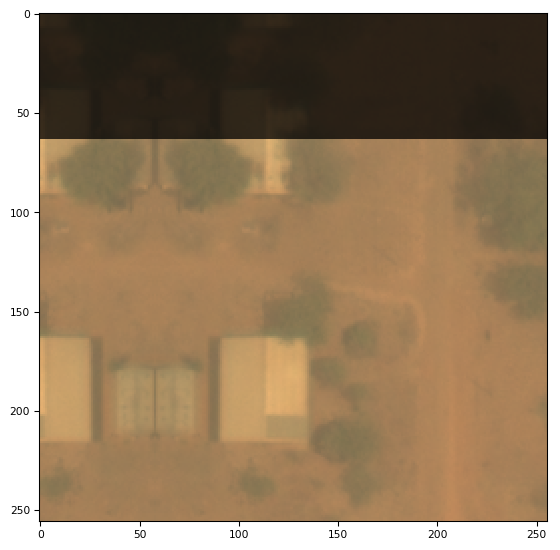

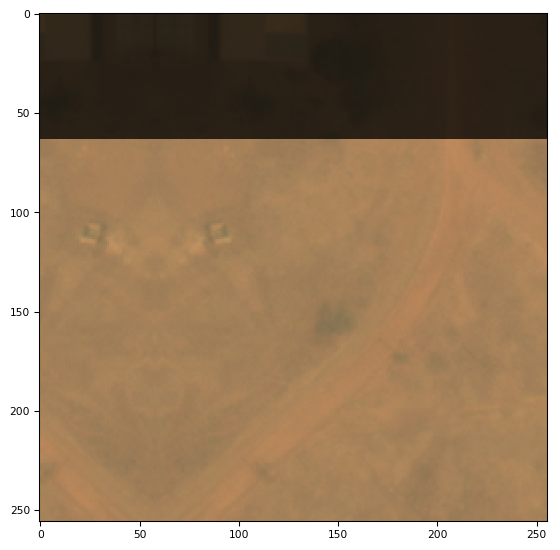

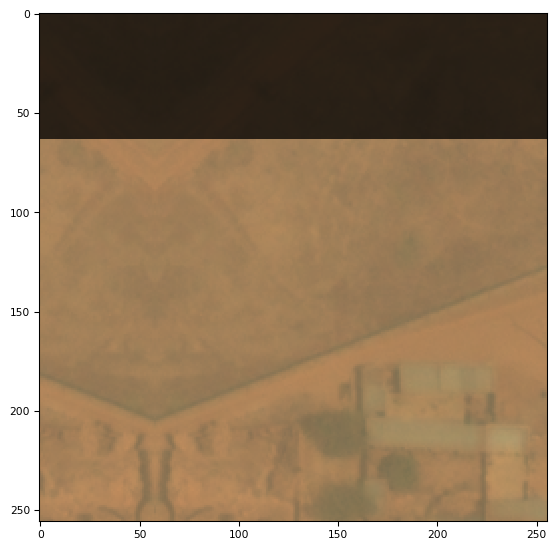

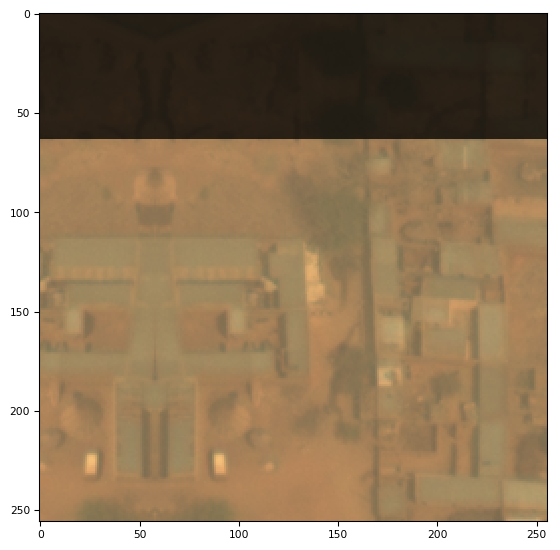

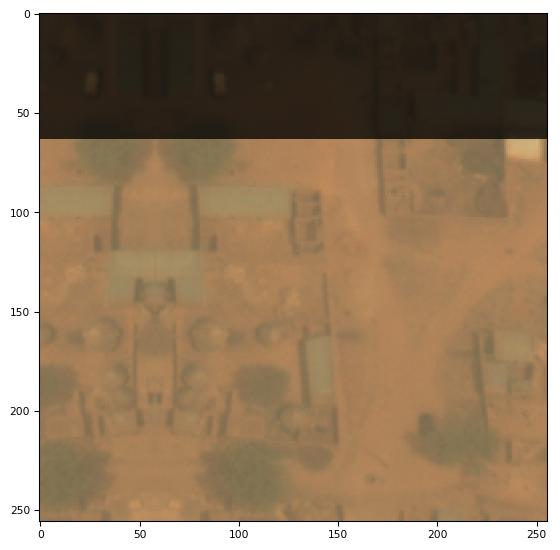

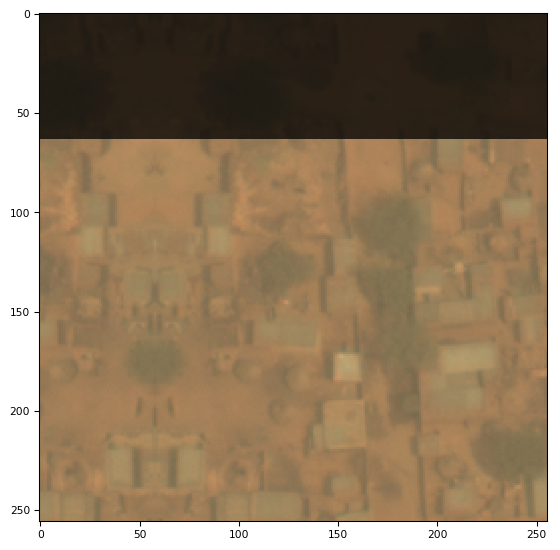

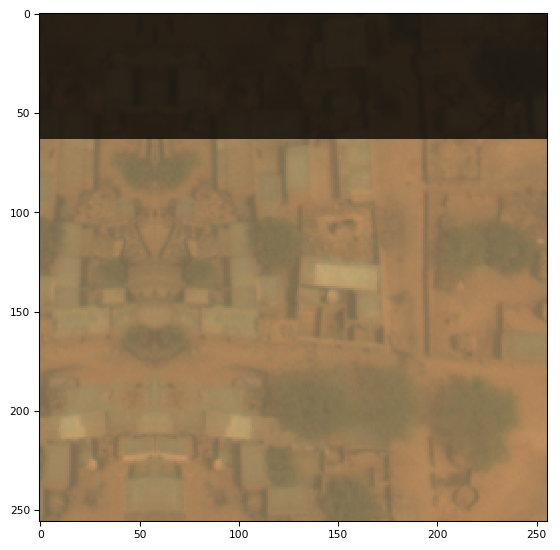

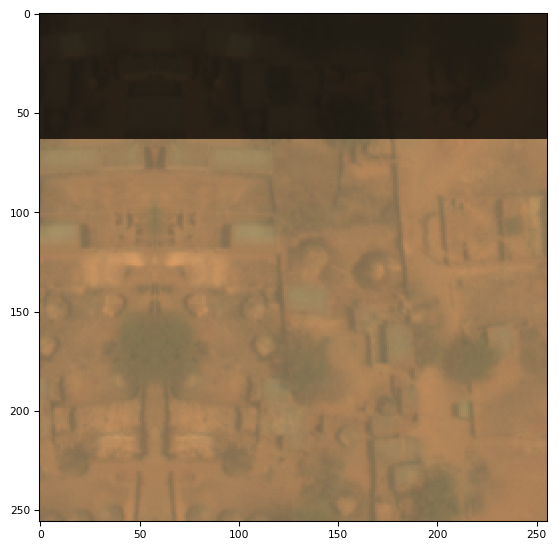

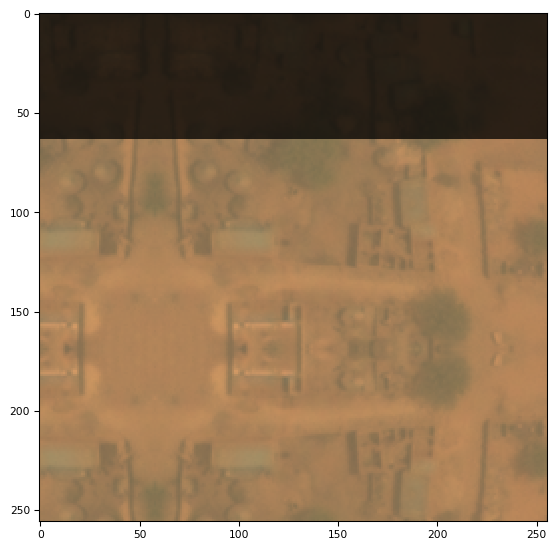

18
(256, 256, 3)


In [49]:
def split_image(img_path, model, size = (256,256), shear = 0.25):
    # Open tiff and make some changes
    img = tiff.imread(img_path)
    img = np.rollaxis(img, 0, 3)
    h,w,_ = img.shape
    
    # Create reflective padding
    shear_int = (int(size[0]*shear),int(size[1]*shear))
    pad_h_1 = (size[0]-shear_int[0]-(h-size[0])%(size[0]-shear_int[0]))//2
    pad_h_2 = (size[0]-shear_int[0]-(h-size[0])%(size[0]-shear_int[0]))//2+(size[0]-shear_int[0]-(h-size[0])%(size[0]-shear_int[0]))%2
    pad_w_1 = (size[1]-shear_int[1]-(w-size[1])%(size[1]-shear_int[1]))//2
    pad_w_2 = (size[1]-shear_int[1]-(w-size[1])%(size[1]-shear_int[1]))//2+(size[1]-shear_int[1]-(w-size[1])%(size[1]-shear_int[1]))%2
    print(pad_h_1,pad_h_2,pad_w_1,pad_w_2)
    img = np.pad(img,((pad_h_1,pad_h_2),(pad_w_1,pad_w_2),(0,0)), 'reflect')
    
    # Split image into patches
    h,w,_ = img.shape
    img_arr = []
    n_rows = (h-size[0])//(size[0]-shear_int[0])+1
    n_cols = (w-size[1])//(size[1]-shear_int[1])+1
    for i in range(n_rows):
        for j in range(n_cols):
            coord_h = i*(size[0]-shear_int[0])
            coord_w = j*(size[1]-shear_int[1])
            img_crop = img[coord_h:coord_h+size[0], coord_w:coord_w+size[1],:]
            img_arr.append(img_crop)
 
    # Create predictions for patches
    mask_arr = []
    for img_crop in img_arr:
        mask_pred = model.predict(img_crop)[0]
        mask_arr.append(mask_pred)
    
    # Merge masks in one
    index = 0
    _, _, channels = mask_arr[0].shape
    final_seg = np.zeros((h,w,channels))
    for i in range (n_rows):
        for j in range (n_cols):
            #print(i,j)
            coord_h = i*(size[0]-shear_int[0])
            coord_w = j*(size[1]-shear_int[1])
            final_seg[coord_h:coord_h+size[0], coord_w:coord_w+size[1]]+=masks_arr[index]
            index+=1
    plt.imshow(final_seg[0])
    plt.show()
split_image('Dataset/DSTL/three_band/6120_3_3.tif')
# def predict_all_img(img_path):
#     tiff.imread

In [2]:
from utils import *

In [3]:
DatasetDstl().generate_DS_for_fly_generator('Dataset/DSTL/Initial/', 'Dataset/DSTL/fly2/', '6010_4_2')

  0%|          | 0/24 [00:00<?, ?it/s]

Test set was created.


100%|██████████| 24/24 [00:30<00:00,  1.28s/it]

Train set was created.
